In [1]:
#Import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font = 'Serif', style = 'white', rc = {'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

In [2]:
#Read data
df = pd.read_csv(r'E:\Downloads\CSVFile\heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Changing the data type for the categorical variables
categorical_var = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
df[categorical_var] = df[categorical_var].astype('category')

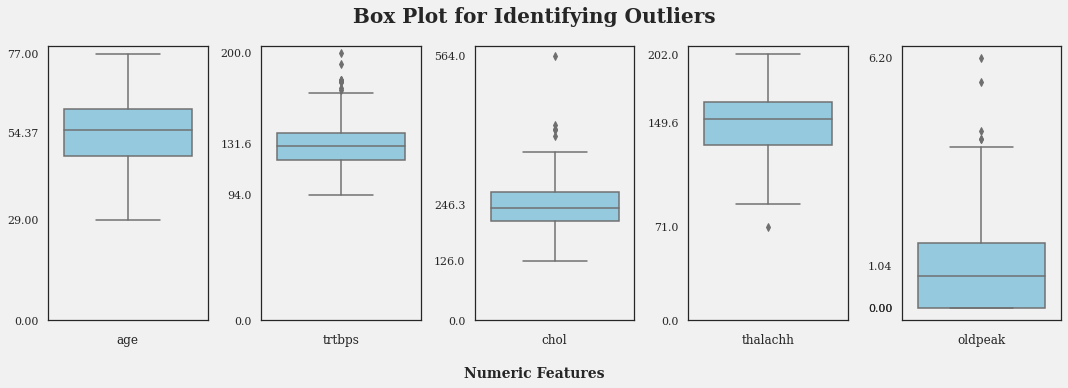

In [4]:
# Checking for the distribution of the numeric features
numeric_var = [i for i in df.columns if i not in categorical_var][:-1]

fig, ax = plt.subplots(1,5, figsize = (15,5))
for axis, num_var in zip(ax, numeric_var):
    sns.boxplot(y = num_var,data = df, ax = axis, color = 'skyblue', orient='v')
    axis.set_xlabel(f"{num_var}", fontsize = 12)
    axis.set_ylabel(None)
    axis.set_yticks([0,df[num_var].min(),df[num_var].max(),df[num_var].mean()])

fig.suptitle('Box Plot for Identifying Outliers', fontsize = 20, weight = 'bold')
fig.text(0.5, -0.05, 'Numeric Features', ha = 'center', fontsize = 14, weight = 'bold')
plt.tight_layout()

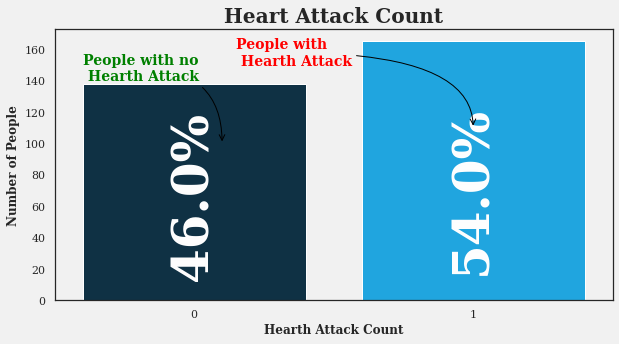

In [5]:
#Check the output
colors = ['#06344d', '#00b2ff']
sns.set(palette = colors, font = 'Serif', style = 'white', 
        rc = {'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

fig = plt.figure(figsize = (10, 5))
ax = sns.countplot(x = 'output', data = df)
for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/7, 
            s = f"{np.round(i.get_height()/len(df)*100, 0)}%", 
            ha = 'center', size = 50, weight = 'bold', rotation = 90, color = 'white')
plt.title("Heart Attack Count", size = 20, weight = 'bold')
plt.annotate(text = "People with no \n Hearth Attack", xytext = (-0.4, 140), xy = (0.1, 100),
             arrowprops = dict(arrowstyle = "->", color = 'black', connectionstyle = "angle3, angleA = 0, angleB = 90"), 
             color = 'green', weight = 'bold', size = 14)
plt.annotate(text = "People with \n Hearth Attack", xytext = (0.15, 150), xy = (1, 110), 
             arrowprops = dict(arrowstyle = "->", color = 'black', connectionstyle = "angle3, angleA = 0, angleB = 90"), 
             color = 'red', weight = 'bold', size = 14)

plt.xlabel('Hearth Attack Count', weight = 'bold')
plt.ylabel('Number of People', weight = 'bold');

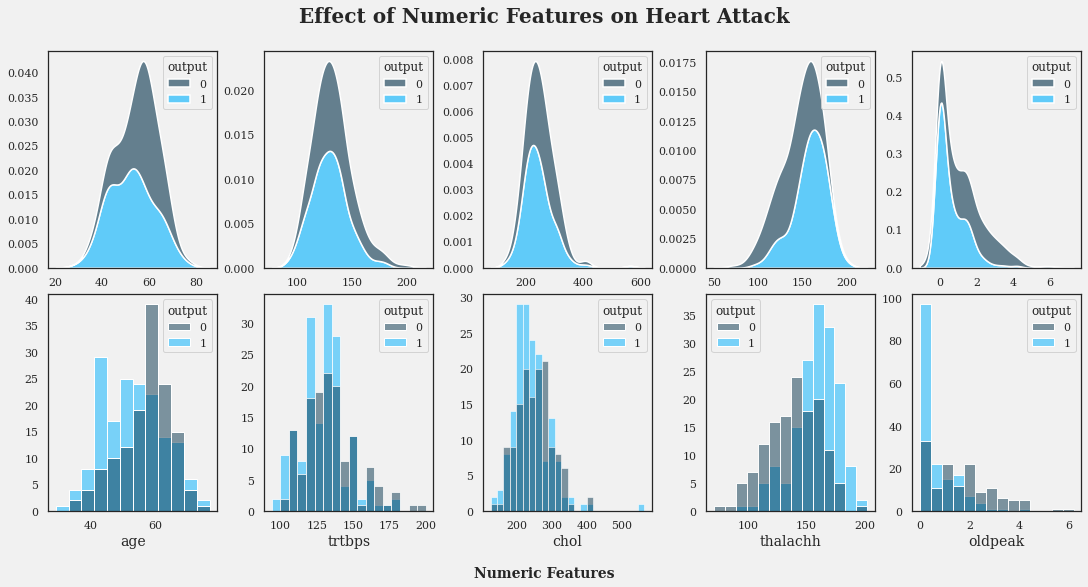

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (15, 7), constrained_layout = True) # axis.patches can't be used
# plt.suptitle('Variation of Heart Attack rate', size = 16, weight = 'bold')

for axis, num_var in zip(ax.ravel(), numeric_var): 
    sns.kdeplot(data = df, x = num_var, hue = 'output', ax = axis,
                fill = True, multiple = 'stack', alpha = 0.6, linewidth = 1.5)
    axis.set_ylabel(None)
    axis.set_xlabel(None)

for i, num_var in zip(range(0, 5), numeric_var): 
    sns.histplot(data = df, x = num_var, hue = 'output', ax = ax[1][i])
    ax[1][i].set_ylabel(None)
    ax[1][i].set_xlabel(f'{num_var}', fontsize = 14)
    
fig.text(0.5, -0.05, 'Numeric Features', ha = 'center', fontsize = 14, weight = 'bold');
fig.text(0.5, 1.05, 'Effect of Numeric Features on Heart Attack', ha = 'center', fontsize = 20, weight = 'bold');

In [7]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [8]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


Text(0.3, 0.4, 'Count plot for various\n categorical features\n_________________')

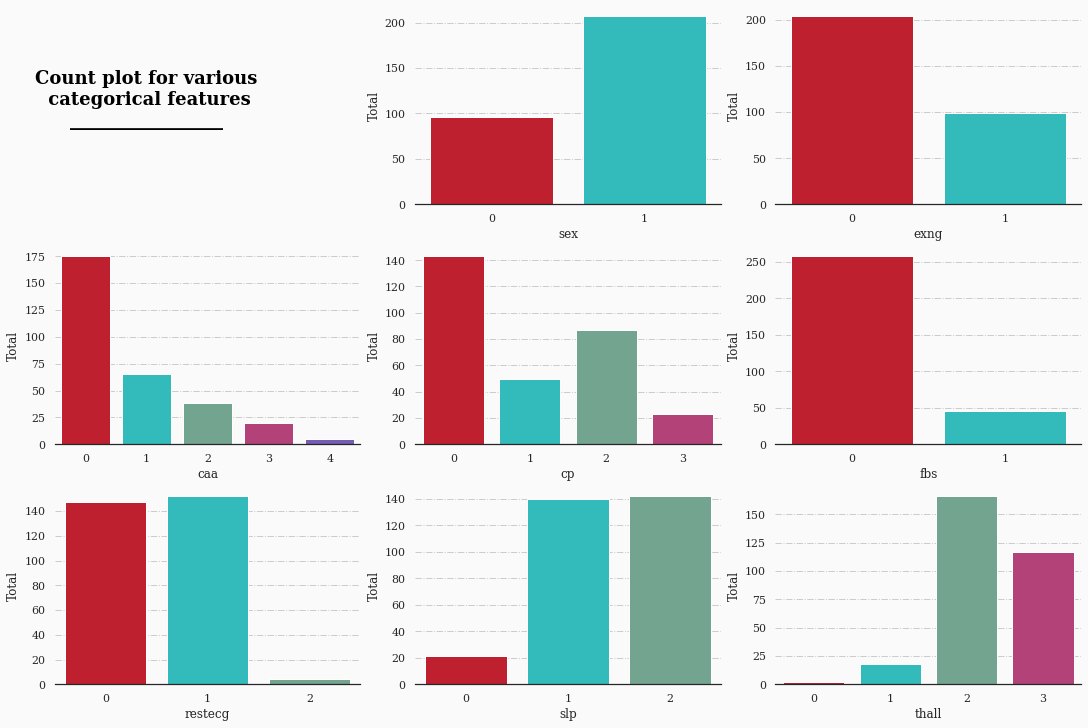

In [9]:
fig,ax = plt.subplots(figsize=(15,10), nrows=3, ncols=3, constrained_layout = True)
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
background_color ='#fafafa'

ax0=ax[0,0]
ax0.set_facecolor(background_color)
ax0.set_xticks([])
ax0.set_yticks([])
for loc in ['top','left','right','bottom']:
        ax0.spines[loc].set_visible(False)


color_palette = ["#d9051b","#1cd1d2","#6aac90","#c43078","#6f4dc3"]
background_color = "#fafafa"
fig.set_facecolor(background_color) # figure background color
ax = np.delete(ax.ravel(),0)
# Plot data

for cats,axes in zip(cat_cols,ax.ravel()):
    axes.set_facecolor(background_color)
    sns.countplot(data=df, x=cats, palette=color_palette, ax=axes, dodge=False)
    for loc in ['top','left','right']:
        axes.spines[loc].set_visible(False)
    axes.grid(which='major',axis='y',ls='-.')
    axes.set_ylabel('Total')

ax0.text(0.3,0.4, 'Count plot for various\n categorical features\n_________________',  horizontalalignment='center',
         verticalalignment='baseline', fontsize=18, fontweight='bold', fontfamily='serif', color="#000000")

Text(0.4, 0.4, 'Boxen plot for various\n continuous features\n_________________')

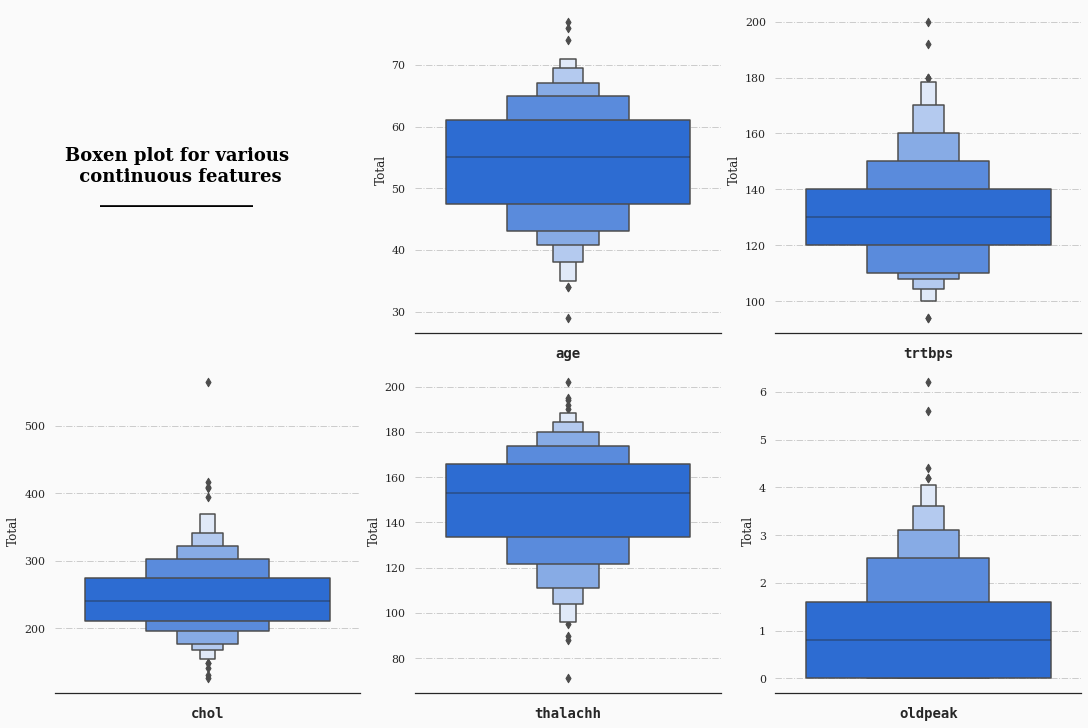

In [10]:
fig,ax = plt.subplots(figsize=(15,10), nrows=2, ncols=3,constrained_layout=True)
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)

ax0=ax[0,0]
ax0.set_facecolor(background_color)
ax0.set_xticks([])
ax0.set_yticks([])
for loc in ['top','left','right','bottom']:
        ax0.spines[loc].set_visible(False)


color_palette = ["#d9051b","#1cd1d2","#6aac90","#c43078","#6f4dc3"]
background_color = "#fafafa"
fig.set_facecolor(background_color) # figure background color
ax = np.delete(ax.ravel(),0)
# Plot data

for cons,axes in zip(con_cols,ax.ravel()):
    axes.set_facecolor(background_color)
    sns.boxenplot(data=df, y=cons, ax=axes,color='#1166ee')
    for loc in ['top','left','right']:
        axes.spines[loc].set_visible(False)
    axes.grid(which='major',axis='y',ls='-.')
    axes.set_ylabel('Total')
    axes.set_xlabel(cons,fontsize=14,fontfamily='monospace',fontweight='bold')

ax0.text(0.4,0.4, 'Boxen plot for various\n continuous features\n_________________',  horizontalalignment='center',
         verticalalignment='baseline', fontsize=18, fontweight='bold', fontfamily='serif', color="#000000")

In [11]:
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


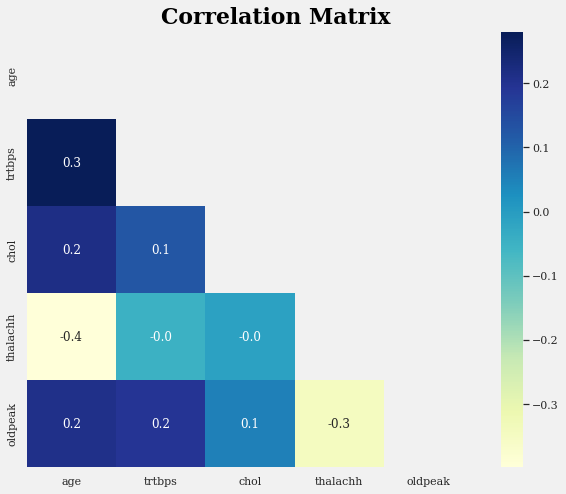

In [12]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

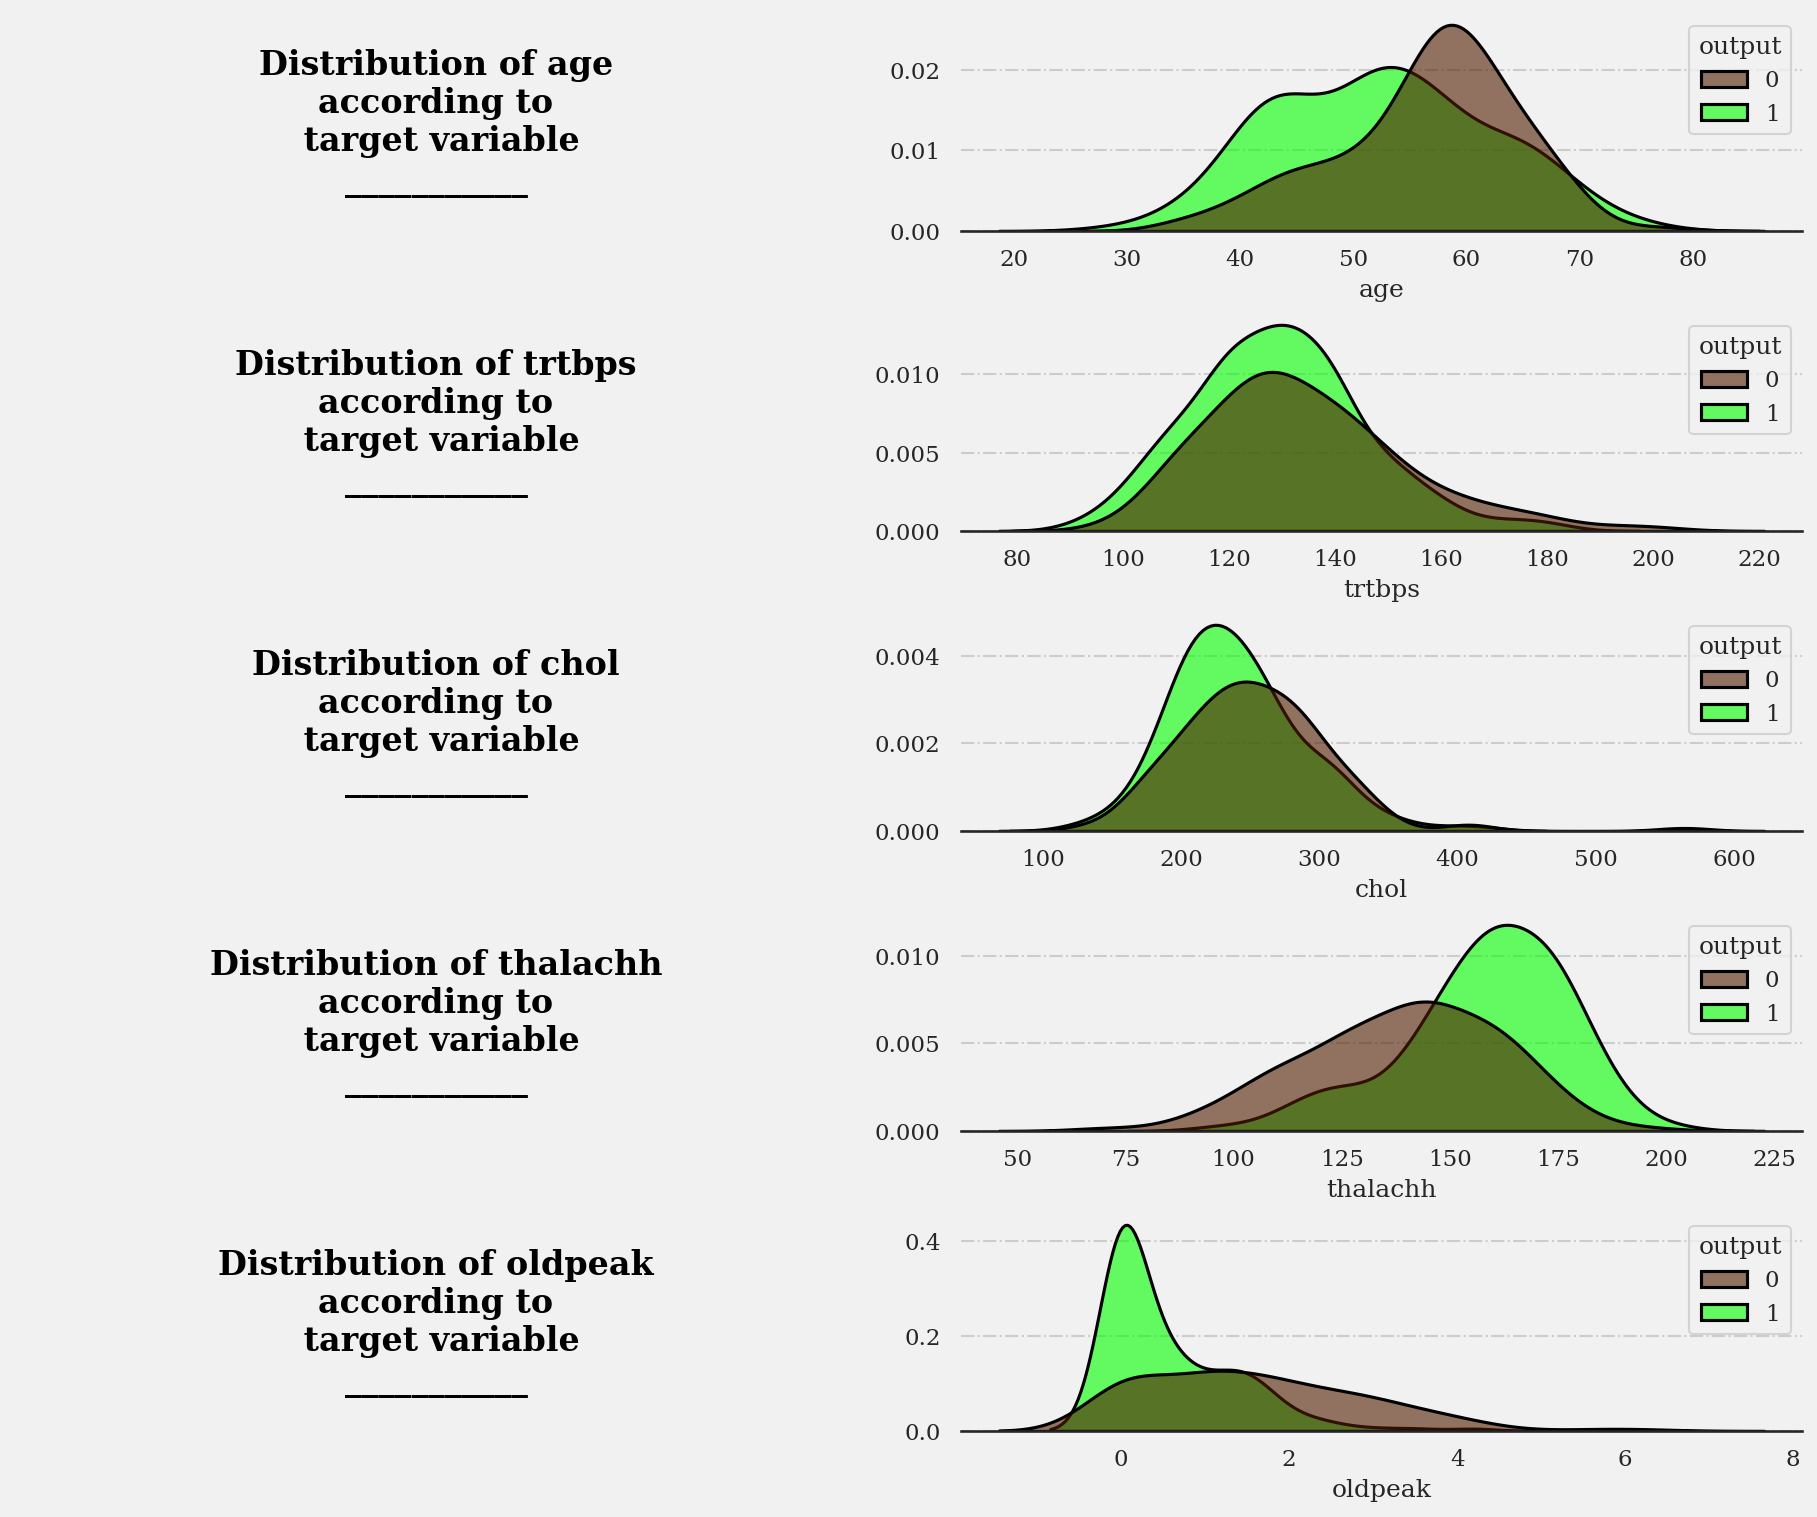

In [13]:
background_color = '#fafafa'
fix,ax = plt.subplots(figsize=(12,10),nrows=5,ncols=2,constrained_layout=True,dpi=150)
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
fig.set_facecolor(background_color)

for i,cons in zip(range(5),con_cols):
    ax[i, 0].set_axis_off()
    ax[i, 0].text(0.5,0.5,"Distribution of " +cons+ "\naccording to\n target variable\n___________",
        horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')
                   
color_palette = ['#511c00','#03ff02']        

for cons,idx in zip(con_cols,range(5)):
    sns.kdeplot(data=df, x=cons, hue = 'output', ax = ax[idx,1],fill = True,edgecolor='black',
                 multiple = 'layer', alpha = 0.6, linewidth = 1.5, palette = color_palette)
    for edg in ['top','left','right']:
        ax[idx,1].spines[edg].set_visible(False)
    
for axes in ax.ravel():    
    axes.grid(which='major',axis='y',ls='-.')
    axes.set_ylabel('')
    axes.tick_params(axis='x',length=5,which='major')
    axes.tick_params(left=False, bottom=False)
    
# Add legend
line_labels = ["Yes", "No"]
fig.legend( labels = line_labels,   # The labels for each line
            loc = "center right", # Position of the legend
            bbox_to_anchor = (1.1, 0.5), 
            borderaxespad = 0.1,    # Small spacing around legend box
            title = "Lower happy" )  # Title for the legend

Text(0.5, 0.5, 'Exercise induced agina\n0 - No\n1 - Yes')

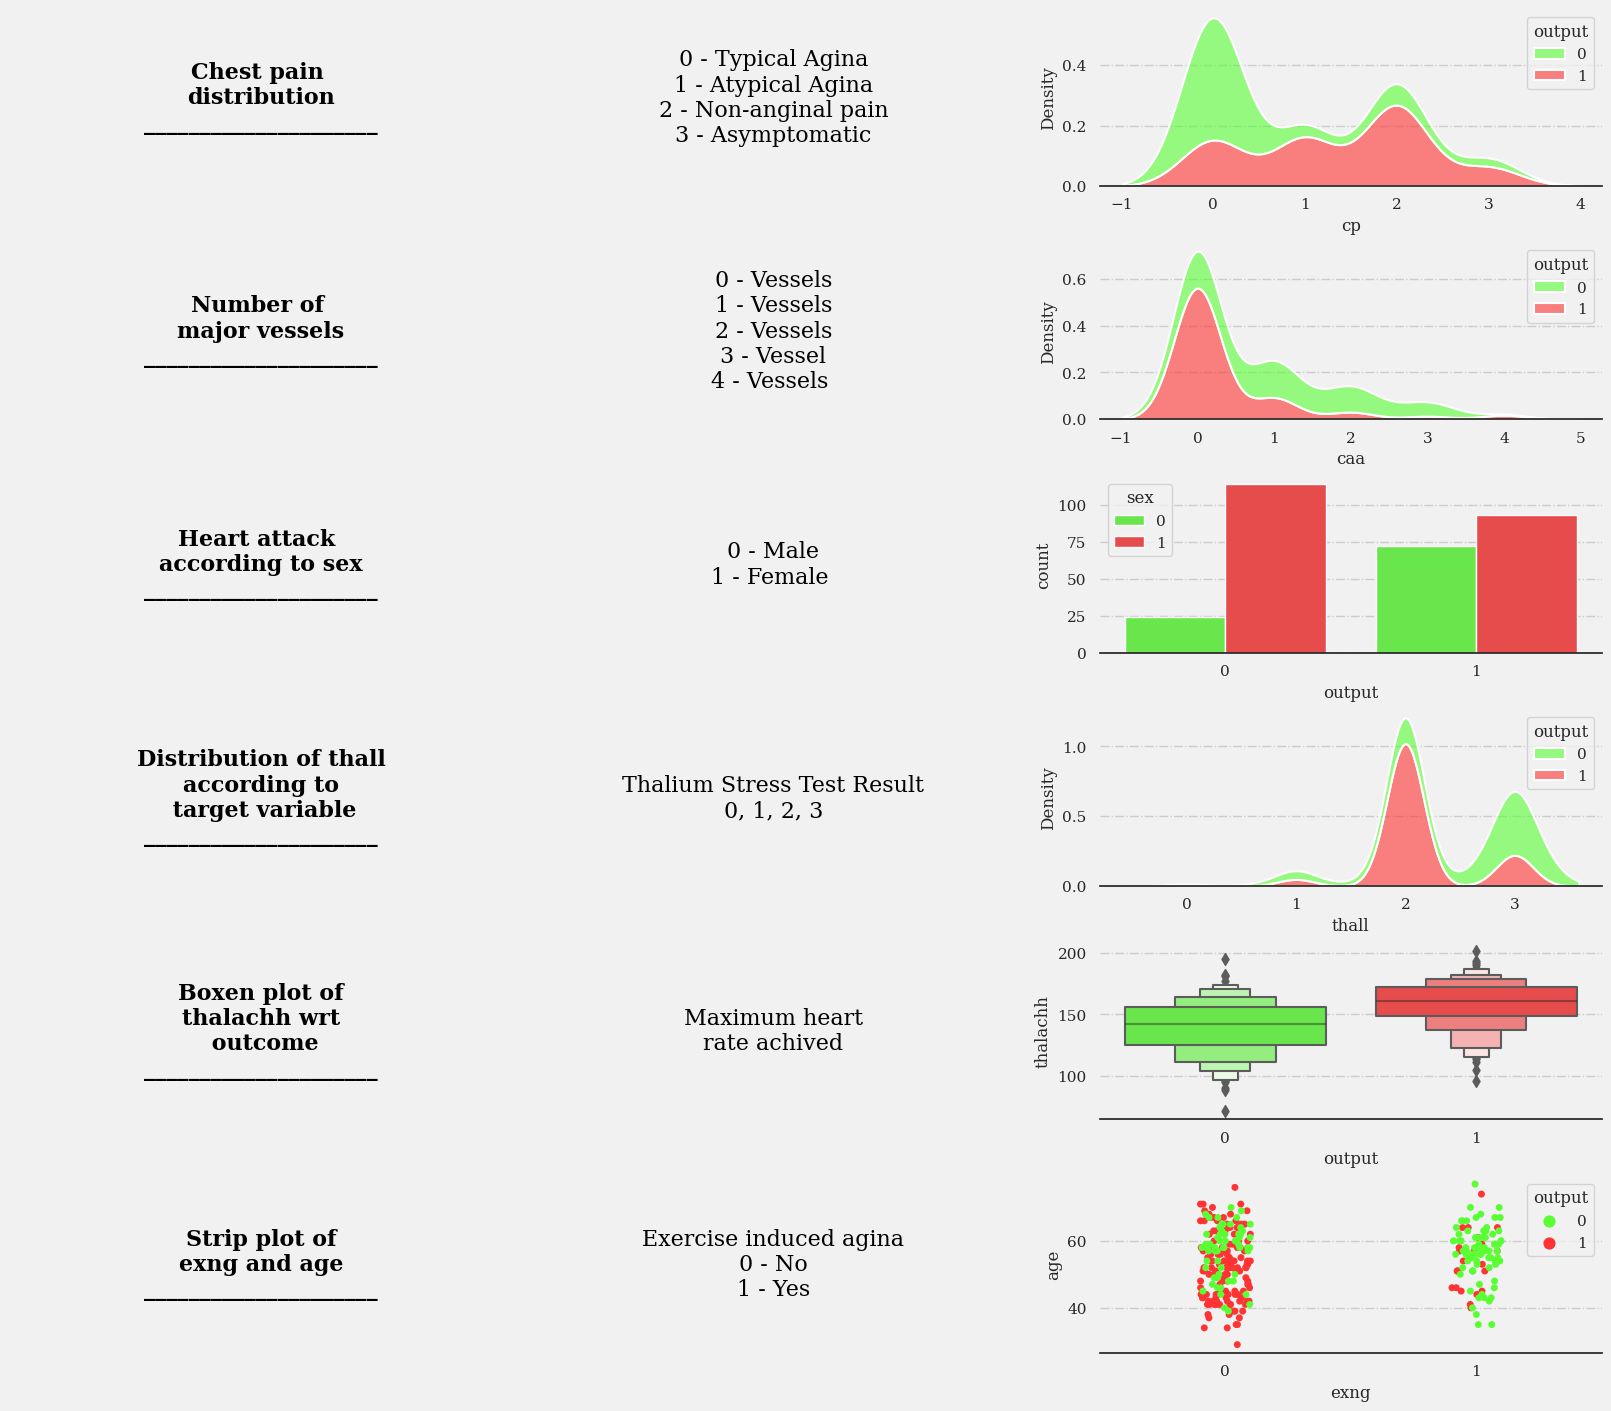

In [14]:
df[categorical_var] = df[categorical_var].astype('int32')

background_color = '#fafafa'
fix,ax = plt.subplots(figsize=(16,14),nrows=6,ncols=3,constrained_layout=True,dpi=100)
gs = fig.add_gridspec(5,3)
gs.update(wspace=0.5, hspace=0.5)
fig.set_facecolor(background_color)

for i in range(0,6):
    ax[i,0].set_axis_off()
    ax[i,1].set_axis_off()
    ax[i,]

# Texting the graph
ax[0,0].text(0.5,0.5,'Chest pain \ndistribution\n_____________________',horizontalalignment = 'center', 
             verticalalignment = 'center',fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')

ax[1,0].text(0.5,0.5,'Number of \nmajor vessels\n_____________________',horizontalalignment = 'center', 
             verticalalignment = 'center',fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')

ax[2,0].text(0.5,0.5,'Heart attack \naccording to sex\n_____________________',horizontalalignment = 'center', 
             verticalalignment = 'center',fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')

ax[3,0].text(0.5,0.5,'Distribution of thall\naccording to\n target variable\n_____________________',
             horizontalalignment = 'center', verticalalignment = 'center',fontsize = 16,
             fontweight='bold',fontfamily='serif',color='#000000')

ax[4,0].text(0.5,0.5,'Boxen plot of\nthalachh wrt\n outcome\n_____________________',horizontalalignment = 'center', 
             verticalalignment = 'center',fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')

ax[5,0].text(0.5,0.5,'Strip plot of\nexng and age\n_____________________',horizontalalignment = 'center', 
             verticalalignment = 'center',fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')

for i in range(0,6):
    ax[i,2].tick_params(axis='x',length=5,which='major')
    ax[i,2].grid(which='major',axis='y',ls='-.')
    for edg in ['top','left','right']:
        ax[i,2].spines[edg].set_visible(False)

color_palette =['#59FF33','#ff3333']
#1        
sns.kdeplot(data=df,x='cp',hue = 'output', ax = ax[0,2],
            fill = True, multiple = 'stack', alpha = 0.6, linewidth = 1.5,palette=color_palette)
ax[0,1].text(0.5,0.5,'0 - Typical Agina\n1 - Atypical Agina\n2 - Non-anginal pain\n3 - Asymptomatic',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

#2
sns.kdeplot(data=df,x='caa',hue = 'output', ax = ax[1,2],
            fill = True, multiple = 'stack', alpha = 0.6, linewidth = 1.5,palette=color_palette)
ax[1,1].text(0.5,0.5,'0 - Vessels\n1 - Vessels\n2 - Vessels\n3 - Vessel\n4 - Vessels ',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

#3
sns.countplot(data=df, x='output', hue='sex', palette=color_palette, ax=ax[2,2])
ax[2,1].text(0.5,0.5,'0 - Male\n1 - Female ',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

#4
sns.kdeplot(data=df,x='thall',hue = 'output', ax = ax[3,2],
            fill = True, multiple = 'stack', alpha = 0.6, linewidth = 1.5,palette=color_palette)
ax[3,1].text(0.5,0.5,'Thalium Stress Test Result\n0, 1, 2, 3',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

#5
sns.boxenplot(data=df, x='output',y='thalachh', ax=ax[4,2],color='#1166ee',palette=color_palette)
ax[4,1].text(0.5,0.5,'Maximum heart\nrate achived',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

#6
sns.stripplot(data=df, x='exng',y='age', ax=ax[5,2],color='#1166ee',palette=color_palette,hue='output')
ax[5,1].text(0.5,0.5,'Exercise induced agina\n0 - No\n1 - Yes',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

In [18]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [19]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()


The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [ ]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train.values.ravel())

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

In [ ]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train.values.ravel())

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

In [ ]:
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train.values.ravel())

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))